In [1]:
library(GLMsData)
data(ratliver)

In [2]:
str(ratliver)

'data.frame':	19 obs. of  4 variables:
 $ BodyWt     : int  176 176 190 176 200 167 188 195 176 165 ...
 $ LiverWt    : num  6.5 9.5 9 8.9 7.2 8.9 8 10 8 7.9 ...
 $ Dose       : num  0.88 0.88 1 0.88 1 0.83 0.94 0.98 0.88 0.84 ...
 $ DoseInLiver: num  0.42 0.25 0.56 0.23 0.23 0.32 0.37 0.41 0.33 0.38 ...


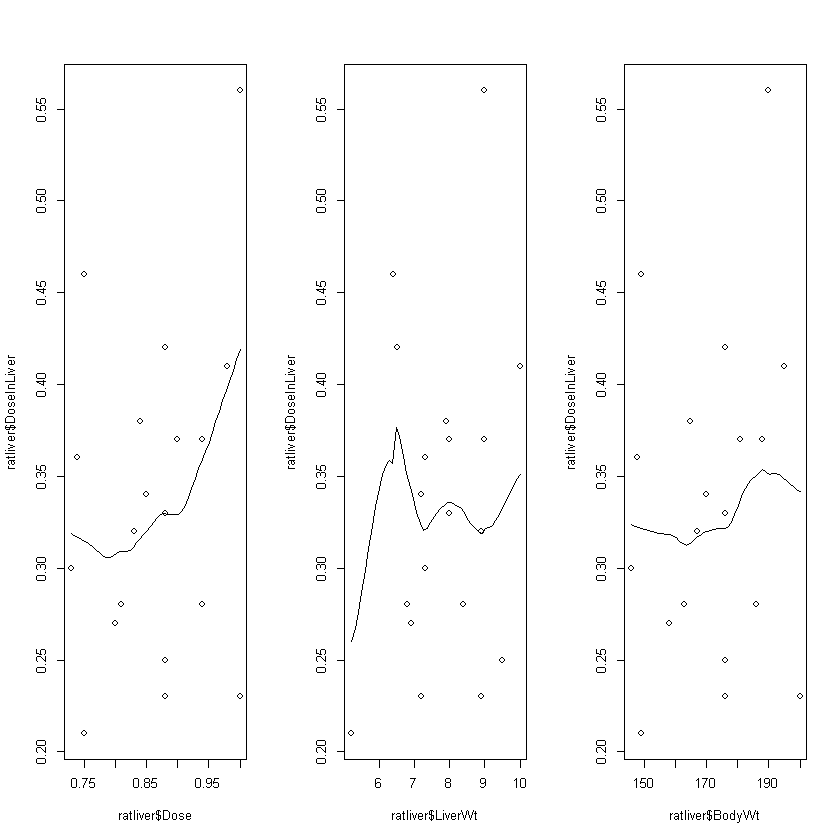

In [4]:
par(mfrow=c(1, 3))
scatter.smooth(ratliver$DoseInLiver ~ ratliver$Dose)
scatter.smooth(ratliver$DoseInLiver ~ ratliver$LiverWt)
scatter.smooth(ratliver$DoseInLiver ~ ratliver$BodyWt)

In [5]:
lm.1 <- lm(DoseInLiver ~ BodyWt + LiverWt + Dose, data=ratliver)

In [6]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.26592177,0.194585255,1.3666080,0.19188433
BodyWt,-0.02124634,0.007974304,-2.6643501,0.01767688
LiverWt,0.01429806,0.017217141,0.8304549,0.41930376
Dose,4.17811141,1.522625206,2.7440183,0.01506639


In [7]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
BodyWt,1,0.003215701,0.003215701,0.5382878,0.47445538
LiverWt,1,0.003067189,0.003067189,0.5134279,0.48466649
Dose,1,0.044981628,0.044981628,7.5296364,0.01506639
Residuals,15,0.089609165,0.005973944,NA,NA


In [8]:
influence.measures(lm.1)

Influence measures of
	 lm(formula = DoseInLiver ~ BodyWt + LiverWt + Dose, data = ratliver) :

     dfb.1_ dfb.BdyW  dfb.LvrW dfb.Dose   dffit cov.r   cook.d    hat inf
1  -0.03835  0.31492 -0.704363 -0.24375  0.8920 0.631 1.69e-01 0.1780    
2   0.14256 -0.09774 -0.481778  0.12561 -0.6088 1.016 8.85e-02 0.1793    
3  -0.23100 -1.66770  0.304572  1.74720  1.9048 7.401 9.30e-01 0.8509   *
4   0.12503 -0.12686 -0.303651  0.14009 -0.4944 0.860 5.72e-02 0.1076    
5   0.52161 -0.39627  0.550016  0.27474 -0.9095 1.524 2.03e-01 0.3915    
6   0.00229  0.01360  0.029003 -0.01715  0.0427 1.567 4.87e-04 0.1612    
7  -0.18376  0.15044 -0.083355 -0.11839  0.3096 1.289 2.46e-02 0.1369    
8  -0.29725  0.05936  0.246500 -0.04042  0.4262 1.520 4.69e-02 0.2537    
9  -0.00968  0.01791  0.000168 -0.01673  0.0427 1.402 4.88e-04 0.0670    
10 -0.00566  0.00993 -0.003365 -0.00929 -0.0140 1.496 5.23e-05 0.1197    
11 -0.29053  0.19381  0.100742 -0.17288 -0.4104 1.066 4.14e-02 0.1195    
12  0.21742 -0.0

In [11]:
which(rowSums(influence.measures(lm.1)$is.inf) > 0)

3 
3

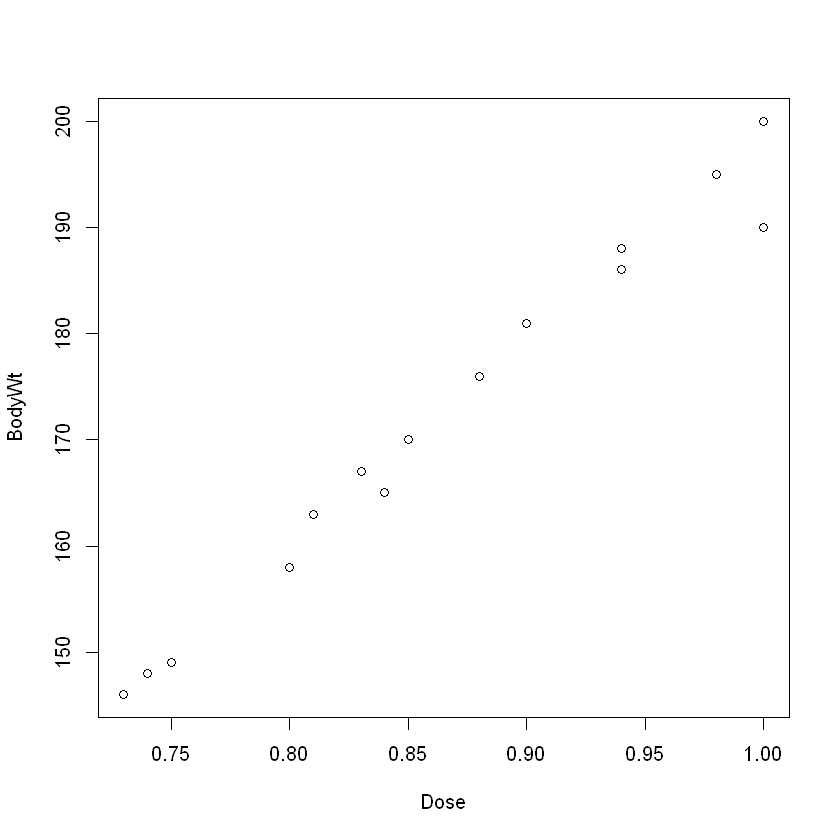

In [10]:
plot(BodyWt ~ Dose, data=ratliver)

In [12]:
lm.2 <- lm(DoseInLiver ~ BodyWt + LiverWt + Dose, data=ratliver, subset=(-3))

In [13]:
coef(summary(lm.2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.311427385,0.20509398,1.5184618,0.1511537
BodyWt,-0.007783059,0.01871680,-0.4158329,0.6838360
LiverWt,0.008989337,0.01865861,0.4817795,0.6374069
Dose,1.484876661,3.71306448,0.3999060,0.6952607


In [14]:
anova(lm.2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
BodyWt,1,3.798103e-05,3.798103e-05,0.006203361,0.9383371
LiverWt,1,8.268114e-04,8.268114e-04,0.135041343,0.7187569
Dose,1,9.791641e-04,9.791641e-04,0.159924787,0.6952607
Residuals,14,8.571715e-02,6.122654e-03,NA,NA
